<a href="https://colab.research.google.com/github/Artificial-i/-1-5/blob/main/hal_Tamrin1_Trm5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tamrin 2 az Term 5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing


In [19]:
df=pd.read_csv('used_cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [21]:
df.shape
df.columns
df.dtypes
df.info()
df.nunique()
# df['buying'].value_counts()
df.isnull().sum()

(8128, 13)

In [25]:
df=df.drop(['torque', 'seats'],axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp


In [26]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [27]:
# df['Age']=df['Age'].fillna(df['Age'].median())
df['mileage']=df['mileage'].fillna(df['mileage'].mode()[0])
df['engine']=df['engine'].fillna(df['engine'].mode()[0])
df['max_power']=df['max_power'].fillna(df['max_power'].mode()[0])
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [41]:
# تغییر مقدارهای غیر عددی
df = pd.get_dummies(df, columns=['name', 'fuel',	'seller_type',	'transmission',	'owner',	'mileage',	'engine',	'max_power'], drop_first=True)
df.head()

KeyError: "['fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power'] not in index"

In [52]:
# پیدا کردن ولیوهای گم شده
# اول ستونههای عددی را بیرون میکشیم
df_numeric_features=df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features=df.select_dtypes(include=["category"])
print(f"Catigorical Features :\n{df_catagory_features}\n")

df_datetime_features=df.select_dtypes(include=['datetime'])
print(f"DateTime Features :\n{df_datetime_features}\n")

df_object_features=df.select_dtypes(include=['object'])
print(f"object Features :\n{df_object_features}\n")


Numeric Features :
      year  selling_price  km_driven
0     2014         450000     145500
1     2014         370000     120000
2     2006         158000     140000
3     2010         225000     127000
4     2007         130000     120000
...    ...            ...        ...
8123  2013         320000     110000
8124  2007         135000     119000
8125  2009         382000     120000
8126  2013         290000      25000
8127  2013         290000      25000

[8128 rows x 3 columns]

Catigorical Features :
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8128 rows x 0 columns]

DateTime Features :
Empty DataF

In [58]:
# پیدا کردن ولیوهای گم شده
from sklearn.impute import SimpleImputer
df.head()
# داده های عددی را پیدا کرد
imputer1 = SimpleImputer(strategy='mean')
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features),columns=df_numeric_features.columns)
df.head()

# دادهای کت گری را پیدا کرد
imputer2 = SimpleImputer(strategy='most_frequent')
df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features),columns=df_catagory_features.columns)

ValueError: at least one array or dtype is required

In [60]:
# ستونهای مربوط به تاریخ و زمان را پیدا کرد
most_frequent_date = df_datetime_features['year'].mode()[0]
df_datetime_features['year']=df_datetime_features['year'].fillna(most_frequent_date)

most_frequent_date= df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end']=df_datetime_features['loan_end'].fillna(most_frequent_date)

KeyError: 'year'

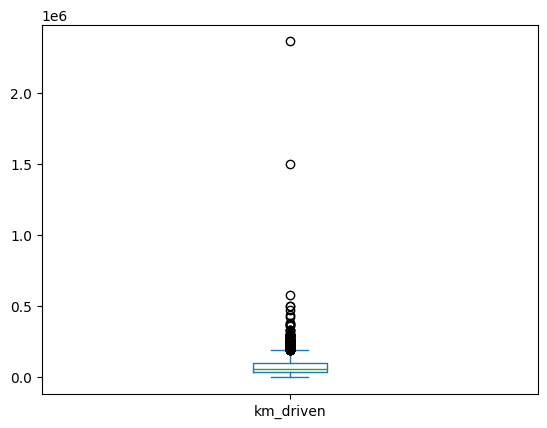

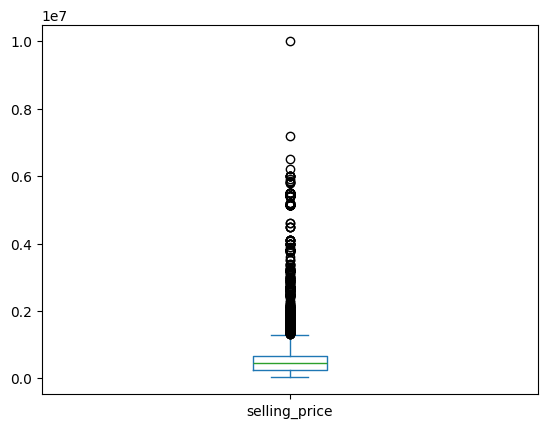

In [72]:
# روش سوم

df['km_driven'].plot(kind='box')
plt.show()
# year
df['selling_price'].plot(kind='box')
plt.show()

In [74]:
# حذف سه رکورد پرت
df=df[(-3< df['km_driven']) & (df['km_driven']<3) & (-3< df['selling_price']) & (df['selling_price']<3)]
df.shape

(0, 847)

In [75]:
# حذف دو ستونی که آورده شده بود تا به کمکش ان داده های پرت را پیدا کنیم
df=df.drop(['km_driven','selling_price'],axis=1)
df.head()

,name,year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,...,max_power_98.59 bhp,max_power_98.6 bhp,max_power_98.63 bhp,max_power_98.79 bhp,max_power_98.82 bhp,max_power_98.96 bhp,max_power_98.97 bhp,max_power_99 bhp,max_power_99.23 bhp,max_power_99.6 bhp


In [ ]:
print('ali')

ali


In [ ]:
# from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_regression

In [ ]:
# ds_iris=load_iris()
# ds_california_housting=fetch_california_housing()
# X,y=make_regression(n_samples=20,n_features=3,noise=0.1)

# print(f"iris Dataset:{ds_iris}")
# print(100*"*")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# df=pd.read_csv('hospital.csv')
df=pd.read_csv('diabetes_all_2016.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_all_2016.csv'

In [ ]:
df.attrs

In [ ]:
df.head()
df.head(10)
df.tail()
df.describe
df.columns
df.index
df.attrs
df.value_counts
df.values
df.dtypes

In [ ]:
?df.head(10)


In [ ]:
df.tail()

In [ ]:
df.columns


In [ ]:
df.attrs


In [ ]:
df.value_counts


In [ ]:
df.value


In [ ]:
import pandas as pd

In [ ]:
pd.Series([1,2,3,4,5])

In [ ]:
pd.Series([range(1,10)])

In [ ]:
df.iloc[10]

In [ ]:
df.value

In [ ]:
df.attrs

In [ ]:
 from sklearn import datasets

In [ ]:
ds=datasets.load_iris()


In [ ]:
ds.feature_names
ds.data
ds.target_names
ds.target
print(ds.DESCR)

In [ ]:
import pandas as pd
target_names = ds.target_names
targets = ds.target
target_series = pd.Series(targets)
target_series = target_series.replace({0:target_names[0],1:target_names[1],2:target_names[2]})

In [ ]:
# ds.data[10,0]
# ds.data[10,0:3]
ds.data[1:5,:3]
# ds.target[0]
# target_series[60:70]

In [ ]:
from sklearn.datasets import make_regression
# X,y=make_regression(n_samples=20, n_features=3,noise=0.1)
# X.shape
# X.dtype

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=20, n_features=5,n_classes=2)
X.shape
X.dtype

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = np.array([24,38,41,72,58,82,124]).reshape(-1,1)
y = np.array([2,3,4,5,6,7,8])
model=LinearRegression()
model.fit(X, y)
print(f"model intercept:{model.intercept_}")
print(f"model conf:{model.coef_}")
y_pred=model.predict(X)
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"R-squared:{r2}")

In [ ]:
# print(y)
# print(y_pred)

In [ ]:
print(f"Mean Squared Error:{mse}")


In [ ]:
new_X=np.array([52,96,32,41,79,62]).reshape(-1,1)


In [ ]:
predicted_y=model.predict(new_X)
print(f"X and y:\n{new_X}==> {predicted_y}")

In [ ]:
plt.scatter(X,y,color='blue')

plt.plot(X,y_pred,color='red')

plt.scatter(new_X,predicted_y,color='green')

plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line','New data'])
plt.grid(True)

In [ ]:
# //////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# video 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normal_equation(X,y):
  return np.linalg.inv(X.T @ X) @ X.T @ y


In [ ]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)** 2)

In [ ]:
def r2_score(y_true, y_pred):
  ss_residual=np.sum((y_true - y_pred)**2)
  ss_total=np.sum((y_true - np.mean(y_true))**2)
  return 1 - (ss_residual/ss_total)

In [ ]:
X=np.array([24,38,41,72,58,82,124]).reshape(-1,1)
y=np.array([2,3,4,5,6,7,8])

In [ ]:
# X=np.c_[np.ones((X.shape[0],1)),X]
X=np.c_[np.ones((X.shape[0],1)),X]


In [ ]:
theta = normal_equation(X,y)

In [ ]:
print(f"Thetas:{theta}")

In [ ]:
y_pred=np.dot(X,theta)

In [ ]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
print(f"Mean Squared Error:{mse}")
print(f"R-squared:{r2}")

In [ ]:
new_X = np.array([52,10,96,32,41,79]).reshape(-1,1)
new_X=np.c_[np.ones((new_X.shape[0],1)),new_X]
predicted_y=np.dot(new_X, theta)



plt.scatter(X[:,1],y,color='blue')
plt.plot(X[:,1],y_pred,color='red')
plt.scatter(new_X[:,1],predicted_y,color='green')

plt.xlabel('X vales')
plt.ylabel('y vales')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line','New data'])
plt.grid(True)
plt.show()

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# vedio 19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.random.seed(42)
X1 = 2 * np.random.rand(100,1)
X2 = 3 * np.random.rand(100,1)
y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100,1)

In [ ]:
X=np.hstack((X1,X2))
# X.shape

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
y_pred=model.predict(X)

In [ ]:
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)

In [ ]:
print(f"Mean Squared Error :{mse}")
print(f"R-squared : {r2}")
# print(f"model colnf : {model.coet_}")
# print(f"modefl intercept:{model.intercept_}")

In [ ]:
X_new1=np.array([[1.75],[1.21]])
X_new2=np.array([[1.2],[2.86]])

X_new=np.hstack((X_new1,X_new2))
y_new_pred=model.predict(X_new)


In [ ]:
print("Predictions for new data:")
for i in range(len(X_new)):
  print(f"Features:{X_new[i]},Prediction:{y_new_pred[i]}")

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],y,color='blue')

ax.scatter(X_new[:,0], X_new[:,1], y_new_pred, color='green')

ax.plot_trisurf(X[:,0].flatten(), X[:,1].flatten(), y_pred.flatten(),color='#ff0',alpha=0.5)

In [ ]:
ax.scatter(X[:,0],X[:,1],y,color='blue')

In [ ]:
# VIDEO20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
df=pd.read_csv('king_county_house_data.csv')

In [ ]:
# df.head()
# df.shape
# df.columns
# df.dtypes
# df.nunique()
# df.info()
# df.describe()
# df.isnull().sum()
# df.corr()
# df.value_counts().to_frame()
# df["floors"].value_counts().to_frame()

In [ ]:
sns.boxplot(x="waterfront",y="price",data=df)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),cbar=False,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Reds')

In [ ]:
# تمرین 1 ترم 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn import preprocessing

# 1:13:30

In [ ]:
df=pd.read_csv('loans.csv', index_col='client_id')
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df.head(5)
# df.shape()
df.columns
df.dtypes
df.nunique()
df.info()
df.describe()
df.describe(exclude=[np.number])
df.isnull().sum()
# df.corr()
# df.value_counts().to_frame()
# df["loan_amount"].value_counts().to_frame()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


In [ ]:
# حذف ستونهای غیر ضرروی
# df.drop(columns=['client_id','loan_id'])
df=df.drop(["loan_id"], axis=1)
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
client_id,,,,,,
46109,home,13672,0,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,2003-10-21,2005-07-17,1.25
46109,home,12734,1,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,2010-07-07,2012-05-21,3.13


In [ ]:
df['repaid'] = df['repaid'].astype('category')
df['loan_type'] = df['loan_type'].astype('category')

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
print(df.dtypes)

loan_type            category
loan_amount             int64
repaid               category
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object


In [ ]:
# پیدا کردن ولیوهای گم شده
# اول ستونههای عددی را بیرون میکشیم
df_numeric_features=df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features=df.select_dtypes(include=["category"])
print(f"Catigorical Features :\n{df_catagory_features}\n")

df_datetime_features=df.select_dtypes(include=['datetime'])
print(f"DateTime Features :\n{df_datetime_features}\n")

df_object_features=df.select_dtypes(include=['object'])
print(f"object Features :\n{df_object_features}\n")


Numeric Features :
           loan_amount  rate
client_id                   
46109            13672  2.15
46109             9794  1.25
46109            12734  0.68
46109            12518  1.24
46109            14049  3.13
...                ...   ...
26945            12963  2.46
26945             1728  5.27
26945             9329  5.65
26945             4197  4.50
26945             3643  0.13

[443 rows x 2 columns]

Catigorical Features :
          loan_type repaid
client_id                 
46109          home      0
46109        credit      0
46109          home      1
46109          cash      1
46109        credit      1
...             ...    ...
26945         other      0
26945        credit      1
26945         other      0
26945          home      0
26945          home      0

[443 rows x 2 columns]

DateTime Features :
          loan_start   loan_end
client_id                      
46109     2002-04-16 2003-12-20
46109     2003-10-21 2005-07-17
46109     2006-02-01 2007-07-05


In [ ]:
# پیدا کردن ولیوهای گم شده
from sklearn.impute import SimpleImputer
# داده های عددی را پیدا کرد
imputer1 = SimpleImputer(strategy='mean')
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features),columns=df_numeric_features.columns)
# دادهای کت گری را پیدا کرد
imputer2 = SimpleImputer(strategy='most_frequent')
df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features),columns=df_catagory_features.columns)

In [ ]:
# ستونهای مربوط به تاریخ و زمان را پیدا کرد
most_frequent_date = df_datetime_features['loan_start'].mode()[0]
df_datetime_features['loan_start']=df_datetime_features['loan_start'].fillna(most_frequent_date)

most_frequent_date= df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end']=df_datetime_features['loan_end'].fillna(most_frequent_date)

In [ ]:
# چسپاندن سه دیتافریم بالا به هم)(عددی و کته گری و تاریخی)
df_numeric_features.reset_index(drop=True, inplace=True)
df_catagory_features.reset_index(drop=True, inplace=True)
df_datetime_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_numeric_features, df_catagory_features,df_datetime_features], axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


In [ ]:
# پیداکردن و برخورد با داده های پردت
# مرحله اول پیدا کردن داده های پرت هست که به سه روش در اینجا انجام میشود
# داده ای برت معمولا در ستونهای عددی هست هر چند امکان دارد رد ستونهای تاریخ و زمان هم باشد
# روش اول
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]


for i, column in enumerate(df_numeric_features.columns):
    outliers = find_outliers(df_numeric_features[column])
    if(outliers.size>0):
      print(f"outliers - {column}:\n{outliers}")


outliers - rate:
41     10.49
195    10.89
421    12.62
Name: rate, dtype: float64


In [ ]:
# روش دوم
import scipy.stats as stats

df['zscore_rate'] = stats.zscore(df['rate'])
df['zscore_loan_amount'] = stats.zscore(df['loan_amount'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,-0.445677,1.365030
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,-0.821544,0.434647
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-1.059594,1.139991
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,-0.825721,1.088170
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,-0.036399,1.455477


In [ ]:
# outliers=df[(df['zscore_rate']<-3) | (df['zscore_rate']>3) | (df['zscore_loan_amount']<-3) | (df['zscore_loan_amount']>3)]
# outliers

In [ ]:
outliers=df[(df['zscore_rate']<-3) | (3 <df['zscore_rate']) | (df['zscore_loan_amount']<-3) | (3 < df['zscore_loan_amount'])]
outliers

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
41,2947.0,10.49,credit,1,2005-11-10,2008-03-16,3.037362,-1.208036
195,6318.0,10.89,other,0,2003-02-02,2005-05-08,3.204415,-0.399290
421,8133.0,12.62,home,1,2009-03-14,2011-03-21,3.926916,0.036152


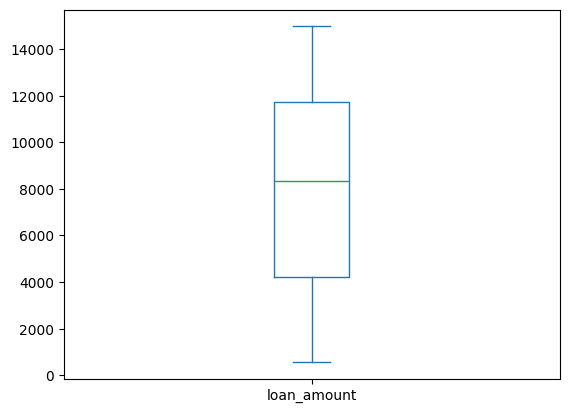

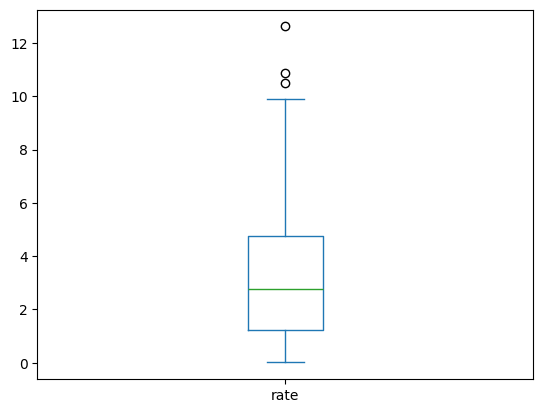

In [ ]:
# روش سوم
df['loan_amount'].plot(kind='box')
plt.show()

df['rate'].plot(kind='box')
plt.show()

In [ ]:
# حذف سه رکورد پرت
df=df[(-3< df['zscore_rate']) & (df['zscore_rate']<3) & (-3< df['zscore_loan_amount']) & (df['zscore_loan_amount']<3)]
df.shape

(440, 8)

In [ ]:
# حذف دو ستونی که آورده شده بود تا به کمکش ان داده های پرت را پیدا کنیم
df=df.drop(['zscore_rate','zscore_loan_amount'],axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


In [ ]:
# بررسی توضیع نرمال
# آیا توضیع نرمال درست اتقاف اقتاده یانه ؟ برای این کار عملیات زیر را انحام میدهیم
# باید لوگاریت و رادیکال ریت را محاسبه کنیم
# به این دلیل این دو تا -Log_RateوLog_Sqrt-را آوردیم که هر کدام بهتر باشد ان را جایگزین کنیم
df['Log_Rate'] = np.log(df['rate'])
df['Sqrt_Rate'] = np.sqrt(df['rate'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,Log_Rate,Sqrt_Rate
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,0.765468,1.466288
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,0.223144,1.118034
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-0.385662,0.824621
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,0.215111,1.113553
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,1.141033,1.769181


In [ ]:
# چولگی را باید حساب کنیم
# هر ستون عددی هست باید اینگونه بررسی شودو گولگی این ستون به
# دست بیایید
# هر چه به صفر نزیکتر بشه بهتره هست
from scipy.stats import skew
print(f"Rate Skewness : {skew(df['rate'])}")
print(f"Log_Rate Skewness : {skew(df['Log_Rate'])}")
print(f"Sqrt_Rate Skewness : {skew(df['Sqrt_Rate'])}")

Rate Skewness : 0.7568149302644803
Log_Rate Skewness : -1.6132127275514359
Sqrt_Rate Skewness : -0.004918465813182981


Text(0.5, 1.0, 'Log_Rate')

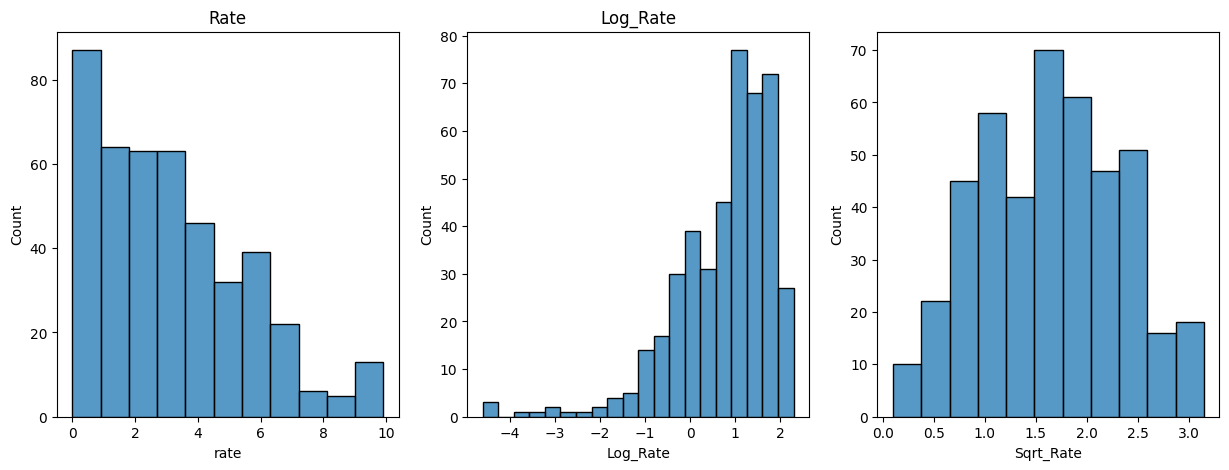

In [ ]:
# البته به بررسی قبل نمی شود اعتماد کرد لذا این عملیات را انجام می دهیم
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['rate'], ax=axes[0])
sns.histplot(x=df['Log_Rate'], ax=axes[1])
sns.histplot(x=df['Sqrt_Rate'], ax=axes[2])
axes[0].set_title('Rate')
axes[1].set_title('Log_Rate')


In [ ]:
# برای اینکه از بین این سه تا بهترین را انتخاب کنیم میانگین هر سه تا را محاسبه میکنیم تا بهترین میانگین بدست بیایید
print(f"Mean of rate : {df['rate'].mean()}")
print(f"Mean of Log_Rate : {df['Log_Rate'].mean()}")
print(f"Mean of Sqrt_Rate : {df['Sqrt_Rate'].mean()}")

Mean of rate : 3.161818181818182
Mean of Log_Rate : 0.7523321265428069
Mean of Sqrt_Rate : 1.6411938929056753


In [ ]:
# اینجا هم حساب کردیم ببینیم ستون ریت چند تا یا چند درصد نزدیک به صفر داریم تا ان بهتر را انتخاب کنیم
#  ریت را بیاور و ببین بین منفی نیم و مثبت نیم جمعشان چقد میشود که مشخص شده چهل تا از ریت های بین منفی نیم و مثبت نیم هستند در نتیجه  تصمیم گرفتیم که اسکیو ریت را جایگزین این دو کنیم تا نرمال تر شوند دیتاها و به همین دلیل ان دو تا را حذف کردیم
count= df['rate'].between(-0.5, 0.5).sum()
print(f"Number of rate values between -0.5 and 0.5 : {count}")
print(f"{count/df.shape[0]:0.2f}")

Number of rate values between -0.5 and 0.5 : 40
0.09


In [ ]:
# حذف کردن دوتایی که نرمال نبودند و تغییر نام یک ستون

df = df.drop(columns=['rate', 'Log_Rate'])

df=df.rename(columns={'Sqrt_Rate': 'rate'})
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,13672.0,home,0,2002-04-16,2003-12-20,1.466288
1,9794.0,credit,0,2003-10-21,2005-07-17,1.118034
2,12734.0,home,1,2006-02-01,2007-07-05,0.824621
3,12518.0,cash,1,2010-12-08,2013-05-05,1.113553
4,14049.0,credit,1,2010-07-07,2012-05-21,1.769181


In [ ]:
# استاندارد سازی باعث میشود داده ها هم وزن شوند
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,1.359338,home,0,2002-04-16,2003-12-20,-0.255589
1,0.430405,credit,0,2003-10-21,2005-07-17,-0.764490
2,1.134650,home,1,2006-02-01,2007-07-05,-1.193253
3,1.082909,cash,1,2010-12-08,2013-05-05,-0.771039
4,1.449644,credit,1,2010-07-07,2012-05-21,0.187026


In [ ]:
from scipy.stats import skew
print(f"Rate skewness : {skew(df['loan_amount'])}")
print(f"Loan Amount Sdewness : {skew(df['loan_amount'])}")

Rate skewness : -0.04662800006628367
Loan Amount Sdewness : -0.04662800006628367


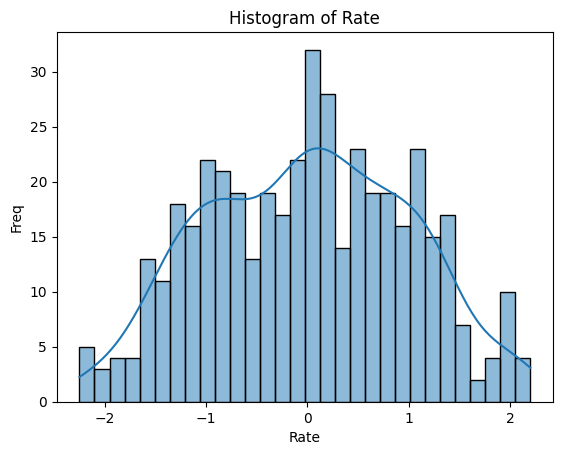

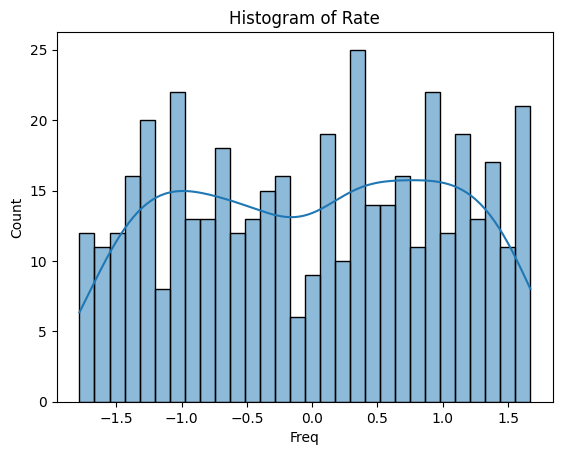

In [ ]:
sns.histplot(df['rate'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()


sns. histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Freq')
plt.show()

In [ ]:
# نرمال سازی البته یکی از این دو کار یعنی استاندار سازی یا نرمال سازی کافی است
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,0.909867,home,0,2002-04-16,2003-12-20,0.448255
1,0.640785,credit,0,2003-10-21,2005-07-17,0.333999
2,0.844782,home,1,2006-02-01,2007-07-05,0.237735
3,0.829795,cash,1,2010-12-08,2013-05-05,0.332529
4,0.936026,credit,1,2010-07-07,2012-05-21,0.547629


In [ ]:
# ویژیگی هایی که کتگوری کار هستند یعنی غیر عددی هستند را میخواهیم اینکودینگ کنیم
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,0.909867,home,0,2002-04-16,2003-12-20,0.448255
1,0.640785,credit,0,2003-10-21,2005-07-17,0.333999
2,0.844782,home,1,2006-02-01,2007-07-05,0.237735
3,0.829795,cash,1,2010-12-08,2013-05-05,0.332529
4,0.936026,credit,1,2010-07-07,2012-05-21,0.547629


In [ ]:
df.dtypes

,0
loan_amount,float64
loan_type,object
repaid,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64


In [ ]:
# حالا میخواهیم آبجکت اول که در واقع کتگوری هست را ان کود بشود
df_dummies = pd.get_dummies(df, columns=['loan_type'], prefix='LT', drop_first=False)
print(df_dummies.head())

   loan_amount repaid loan_start   loan_end      rate  LT_cash  LT_credit  \
0     0.909867      0 2002-04-16 2003-12-20  0.448255    False      False   
1     0.640785      0 2003-10-21 2005-07-17  0.333999    False       True   
2     0.844782      1 2006-02-01 2007-07-05  0.237735    False      False   
3     0.829795      1 2010-12-08 2013-05-05  0.332529     True      False   
4     0.936026      1 2010-07-07 2012-05-21  0.547629    False       True   

   LT_home  LT_other  
0     True     False  
1    False     False  
2     True     False  
3    False     False  
4    False     False  


In [ ]:
# همین کار ان کود کردن را میتوانیم با وان هات ان کودر انجام بدهیم

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_features = encoder.fit_transform(df[['loan_type']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['loan_type']))
df_onehot = pd.concat([df.drop('loan_type', axis=1),encoded_df], axis=1)
df_onehot

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.909867,0,2002-04-16,2003-12-20,0.448255,0.0,0.0,1.0,0.0
1,0.640785,0,2003-10-21,2005-07-17,0.333999,0.0,1.0,0.0,0.0
2,0.844782,1,2006-02-01,2007-07-05,0.237735,0.0,0.0,1.0,0.0
3,0.829795,1,2010-12-08,2013-05-05,0.332529,1.0,0.0,0.0,0.0
4,0.936026,1,2010-07-07,2012-05-21,0.547629,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
441,0.252429,0,2003-10-16,2005-07-10,0.663160,NaN,NaN,NaN,NaN
442,0.213988,0,2010-03-24,2011-12-22,0.085484,NaN,NaN,NaN,NaN
41,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0
195,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0


In [ ]:
# کار گذشته یعنی اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name= 'loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_encoded
0,0.909867,0,2002-04-16,2003-12-20,0.448255,2
1,0.640785,0,2003-10-21,2005-07-17,0.333999,1
2,0.844782,1,2006-02-01,2007-07-05,0.237735,2
3,0.829795,1,2010-12-08,2013-05-05,0.332529,0
4,0.936026,1,2010-07-07,2012-05-21,0.547629,1
...,...,...,...,...,...,...
435,0.860672,0,2001-11-26,2004-06-11,0.481769,3
436,0.081113,1,2004-01-27,2005-06-21,0.720353,1
437,0.608521,0,2001-12-17,2004-07-22,0.747035,3
438,0.252429,0,2003-10-16,2005-07-10,0.663160,2


In [ ]:
# از روی فیچرها فیچرهای مشتق به دست بیاوریم یعنی از روی فیچرها یک سری فیچر بیسازیم
# اگر اضافه هست حذف بشود یا باهم یک جدید ساخته شود و... که در اینجا میخواهیم
#  تاریخ شروع و پایان را از هم کم کنیم تا مقدار کل روزهای اتمام هر وام به دست بیاد

df_loans=df
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']
df_loans

,loan_amount,loan_type,repaid,loan_start,loan_end,rate,loan_tenure
0,0.909867,home,0,2002-04-16,2003-12-20,0.448255,613 days
1,0.640785,credit,0,2003-10-21,2005-07-17,0.333999,635 days
2,0.844782,home,1,2006-02-01,2007-07-05,0.237735,519 days
3,0.829795,cash,1,2010-12-08,2013-05-05,0.332529,879 days
4,0.936026,credit,1,2010-07-07,2012-05-21,0.547629,684 days
...,...,...,...,...,...,...,...
435,0.860672,other,0,2001-11-26,2004-06-11,0.481769,928 days
436,0.081113,credit,1,2004-01-27,2005-06-21,0.720353,511 days
437,0.608521,other,0,2001-12-17,2004-07-22,0.747035,948 days
438,0.252429,home,0,2003-10-16,2005-07-10,0.663160,633 days


In [ ]:
df_loans.dtypes

,0
loan_amount,float64
loan_type,object
repaid,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64
loan_tenure,timedelta64[ns]


In [ ]:
import datetime as dt
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days / 365
df_loans=df_loans.drop(['loan_start','loan_end'],axis=1)
df_loans

,loan_amount,loan_type,repaid,rate,loan_tenure
0,0.909867,home,0,0.448255,1.679452
1,0.640785,credit,0,0.333999,1.739726
2,0.844782,home,1,0.237735,1.421918
3,0.829795,cash,1,0.332529,2.408219
4,0.936026,credit,1,0.547629,1.873973
...,...,...,...,...,...
435,0.860672,other,0,0.481769,2.542466
436,0.081113,credit,1,0.720353,1.400000
437,0.608521,other,0,0.747035,2.597260
438,0.252429,home,0,0.663160,1.734247


In [ ]:
df=df_loans
df.head()

,loan_amount,loan_type,repaid,rate,loan_tenure
0,0.909867,home,0,0.448255,1.679452
1,0.640785,credit,0,0.333999,1.739726
2,0.844782,home,1,0.237735,1.421918
3,0.829795,cash,1,0.332529,2.408219
4,0.936026,credit,1,0.547629,1.873973


In [ ]:
# کار گذشته یعنی اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name= 'loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label
df=df_label
df.head()

,loan_amount,repaid,rate,loan_tenure,loan_type_encoded
0,0.909867,0,0.448255,1.679452,2
1,0.640785,0,0.333999,1.739726,1
2,0.844782,1,0.237735,1.421918,2
3,0.829795,1,0.332529,2.408219,0
4,0.936026,1,0.547629,1.873973,1


In [ ]:
# اگرهمه چیز درست شده یعنی داده های کتگوری کال تبدیل شده هاند به عدد و دادههای اضافی حذف شده اند و داده ها توزیعشان نرمال شده همچنین استاندارد شده اند حالا وقتش هست که مشخص کنیم قسمت ویيژگی ها و تارگت را برای اینکه مدلهای خودمان را باهاش آموزش بدهیم
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state =0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((352, 4), (88, 4), (352,), (88,))

In [ ]:
# بررسی سینگل لینر ریگریشن
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_single = X_train[['loan_type_encoded']]
X_test_single = X_test[['loan_type_encoded']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

MSE: 0.08003888099671257
R2: -0.0010947929194713435


In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")

MSE: 0.08057721357067961
R2: -0.007828044683442004


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {2}) - MSE: {mse_poly}, R2: {r2_poly}")

Polynomial Regression (Degree 2) - MSE: 0.05057893650780321, R2: -0.03887254972541121


In [ ]:
# بدست آوردن نال ها
df.isnull().sum()

,0
loan_amount,0
repaid,0
rate,0
loan_tenure,0
loan_type_encoded,0


In [ ]:
# استاندارد سازی
from sklearn.preprocessing import StandardScaler
def standard_scaler(df):
    scaler=StandardScaler()
    df=scaler.fit_transform(df)
    return df



In [ ]:
# df.loan_end=pd.to_int(df.loan_end)
# df.info()

In [ ]:
# ایجاد همبستگی
# df.corr(method='pearson',numeric_only=True)

In [ ]:
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

R-squared:-0.03887254972541121


In [ ]:
X =df[['repaid']]
y =df['rate']
model=LinearRegression()
model.fit(X, y)
model.score(X, y)


0.0004813893882936737

In [ ]:
features=['loan_type','loan_amount','loan_start','loan_end']
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

R-squared:-0.03887254972541121


In [ ]:
features=['loan_type','loan_amount','loan_start','loan_end']
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
pf=PolynomialFeatures(degree=3)
X_train_poly=pf.fit_transform(X_train)
X_test_poly=pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
model.score(X_test_poly,y_test)

-0.03887254972541121

<Axes: xlabel='rate', ylabel='repaid'>

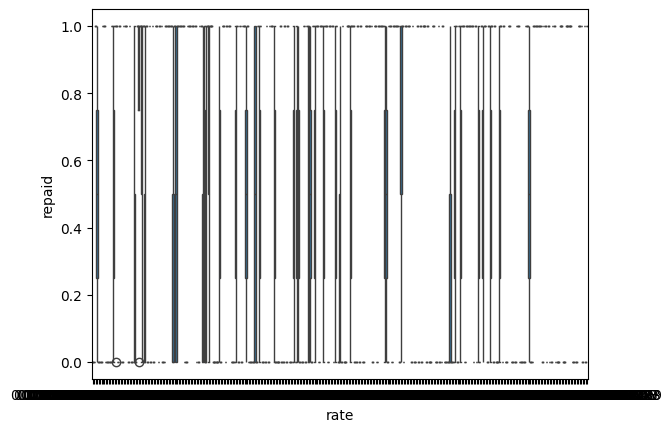

In [ ]:
sns.boxplot(x="rate",y="repaid",data=df)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
# print(f"model intercept:{model.intercept_}")
# print(f"model conf:{model.coef_}")
# mse=mean_squared_error(y,y_pred)


In [ ]:
# درس 25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df=pd.read_csv('auto-mpg.csv')
df.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [ ]:
df.head()
df.shape
df.columns
df.dtypes
df.duplicated().sum()
df.nunique()
df.cylinders.nunique()
df.info()
df.describe()
df.isnull().sum()
df.corr(numeric_only=True)
df['cylinders'].value_counts()
df['displacement'].value_counts().to_frame()
(df['horsepower'].str.isnumeric()==False).sum()
(df['horsepower']=='?').sum()
(df=="?").sum()
df[df['horsepower']=='?']

df[df['origin']==1].shape
df[df['origin']==2].shape
df[df['origin']==3].shape
# df.value_counts().to_frame()
# df["floors"].value_counts().to_frame()

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df=df.drop('car name',axis=1)
df.head()

In [ ]:
df=df.drop('car name',axis=1)
df.head()

In [ ]:
df=df.apply(lambda X: X.fillna(X.median()),axis=0)

In [ ]:
df["horsepower"] = df["horsepower"].astype(int)
df.dtypes

In [ ]:
plt.figure(figsize=(15,8))
corr=df.corr()
mask=np.triu(corr)
sns.heatmap(corr,square=True,mask=mask,annot=True,fmt='.2f')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='origin')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title("origin distribution")
plt.xlabel("origin")
plt.ylabel("car count")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x='model year',y = 'mpg',hue='origin',data=df,errorbar=None);
plt.title("model year - mpg based on origin")
plt.xlabel("model year")
plt.ylabel("mpg")
plt.show()

In [ ]:
X=df.drop('mpg',axis=1)
y=df[['mpg']]
X.shape
y.shape

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train,y_train)

In [ ]:
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

In [ ]:
dlastec=ElastecNet(alpha=0.5,l1_ratio=0.2)
elastic.fit(x_train,y_train)

In [ ]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_rest))

In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x test,y_test))

In [ ]:
# ///////////////////////////////////////////////////////

In [ ]:
# video 26

In [ ]:
!pip install scikit-optimize

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import numpy as np

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
model=ElasticNet()
params = {
             'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
            }
grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=params,
                            scoring='r2',
                            cv=5,
                           )
grid_search.fit(X_train, y_train)

print("Grid Search:\n===========================")
print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best R2 Score:{grid_search.best_score_}")